In [1]:
from google.colab import drive
drive.mount('/content/drive/')

# ======= < Basic imports > ==============
import nltk
import nltk.classify.util
import numpy as np
import pandas as pd
import string
import unicodedata
import sklearn.datasets,sys,re,timeit
import json
import argparse
import matplotlib.pyplot as plt
import seaborn
import warnings
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec
import itertools
import sqlite3
import time
import sys
import gensim
import random
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
import time

# =========== < End > ===================

#========= Classifiers ===========================================
from nltk.corpus import names
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import GradientBoostingClassifier, RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import FunctionTransformer,StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_regression
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import Ridge,Lasso,RidgeClassifier,SGDClassifier
from sklearn.utils import shuffle
from mlxtend.classifier import EnsembleVoteClassifier
from itertools import combinations
#from mlens.ensemble import SuperLearner
from gensim.models.word2vec import Word2Vec
from gensim.models import FastText  
#from glove import Corpus, Glove
# =========== < End > ===================

#========== <Count Vectorization,feature extraction and summaries > ======================
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import  train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,mean_squared_error,mean_absolute_error
# =========== < End > ===================

from sklearn.metrics import precision_recall_fscore_support as score
from keras.models import Sequential,Model
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional,Activation, Input, Embedding,GRU
from keras.optimizers import Adam,RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, TensorBoard
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec,FastText 
from sklearn.preprocessing import scale
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from collections import Counter

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
import pickle

In [7]:
def Remove_HTML_Elements_For_Df(inputlistDf):
        try:
            for i in range(len(inputlistDf)):
                current_comment= inputlistDf['Comments1'].values[i]
                inputlistDf['Comments1'].values[i] =BeautifulSoup(current_comment,"html.parser").get_text()
            
            return inputlistDf

        except Exception as e:        
                  e = sys.exc_info()[1]
                  full_Error="Remove_HTML_Elements_For_Df: "+str(e)+"\n"
                  raise Exception(full_Error)

In [10]:
 def Remove_NonWord_Entries_For_Df(input_Df):
          try:

              non_Word_Entry_List=[]
              #Remove non words
              for i in range(len(input_Df)):
                  current_comment= input_Df['Comments1'].values[i]     

                  #Then append back after checking for numerical values
                  input_Df['Comments1'].values[i]=(' '.join([word for word in current_comment.split() if word.isdigit()==False]))       

              return input_Df     

          except Exception as e:
                    e = sys.exc_info()[1]
                    full_Error="Remove_NonWord_Entries_For_Df: "+str(e)+"\n"
                    raise Exception(full_Error)

In [15]:
def Remove_Special_Characters_For_List(input_comment,pronouns_List):
        try:
            regex = re.compile('[%s]' % re.escape(string.punctuation))
            cleaned_List = []
           
            for current_comment in input_comment:
                tokenized_List = []
                punctuation_Splitted_List=[]
                punctuation_Removed_String = ""
                for split_comment in current_comment.split():
                    split_comment = re.sub('\@\w+', '', split_comment)
                    split_comment = re.sub('\#\w+','', split_comment)
                    split_comment = re.sub('\#','',split_comment)
                    split_comment = re.sub('RT','',split_comment)
                    split_comment = re.sub('&amp;','',split_comment)
                    split_comment = re.sub('[0-9]+','',split_comment)
                    split_comment = re.sub('//t.co/\w+','',split_comment)
                    split_comment = re.sub('w//','',split_comment)
                    split_comment = split_comment.lower()
                    tokenized_List.append(split_comment.split())   
                    
                for tokenized_Elem in tokenized_List:
                    punctuation_Removed_Elem=regex.sub('', str(tokenized_Elem))
                    punctuation_Splitted_List.append(punctuation_Removed_Elem)
                    
                                       
                for elem in punctuation_Splitted_List:         
                    if  elem not in pronouns_List:
                        punctuation_Removed_String+=(" "+elem)
                        
                        
                cleaned_List.append(punctuation_Removed_String) 
                
            return cleaned_List

        except Exception as e:        
            e = sys.exc_info()[1]
            full_Error="Remove_Special_Characters_For_List: "+str(e)+"\n"
            raise Exception(full_Error)
            #return full_Error
            
def Remove_Special_Characters_For_Df(inputlistDf,pronouns_List):
        try:
            regex = re.compile('[%s]' % re.escape(string.punctuation))
            cleaned_List = []
           
            for i in range(len(inputlistDf)):
                current_comment= inputlistDf['Comments1'].values[i]
                tokenized_List = []
                punctuation_Splitted_List=[]
                punctuation_Removed_String = ""
                for split_comment in current_comment.split():
                    split_comment = re.sub('\@\w+', '', split_comment)
                    split_comment = re.sub('\#\w+','', split_comment)
                    split_comment = re.sub('\#','',split_comment)
                    split_comment = re.sub('RT','',split_comment)
                    split_comment = re.sub('&amp;','',split_comment)
                    split_comment = re.sub('[0-9]+','',split_comment)
                    split_comment = re.sub('//t.co/\w+','',split_comment)
                    split_comment = re.sub('w//','',split_comment)
                    split_comment = split_comment.lower()
                    tokenized_List.append(split_comment.split())   
                    
                for tokenized_Elem in tokenized_List:
                    punctuation_Removed_Elem=regex.sub('', str(tokenized_Elem))
                    punctuation_Splitted_List.append(punctuation_Removed_Elem)
                    
                                       
                for elem in punctuation_Splitted_List:         
                    if  elem not in pronouns_List:
                        punctuation_Removed_String+=(" "+elem.lower())
                        
                        
                inputlistDf['Comments1'].values[i]=punctuation_Removed_String
                
            return inputlistDf

        except Exception as e:        
            e = sys.exc_info()[1]
            full_Error="Remove_Special_Characters_For_Df: "+str(e)+"\n"
            raise Exception(full_Error)
            #return full_Error

In [16]:
#setting the data sets 
training_Data_Path='/content/drive/My Drive/Colab Notebooks/FYP/CommentsRefined.csv'
pronouns_List='/content/drive/My Drive/Colab Notebooks/FYP/Pronouns.csv'
training_Data_df= pd.read_csv(training_Data_Path,usecols=[0,1],header='infer',encoding='utf-8')  
pronouns_df=pd.read_csv(pronouns_List,usecols=[0],header=None,encoding='utf-8')            
pronouns_List=pronouns_df[0].values.tolist()


In [21]:
html_Cleaned_Training_Df=Remove_HTML_Elements_For_Df(training_Data_df)
special_Symbol_Cleaned_Phrases_Df=Remove_Special_Characters_For_Df(html_Cleaned_Training_Df,pronouns_List)
comment_Cleaned_NonWord_Df=Remove_NonWord_Entries_For_Df(special_Symbol_Cleaned_Phrases_Df)
comment_Cleaned_NonWord_Df=comment_Cleaned_NonWord_Df.head(801)
comment_Cleaned_NonWord_Df=shuffle(comment_Cleaned_NonWord_Df)
#print(comment_Cleaned_NonWord_Df)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(comment_Cleaned_NonWord_Df.Comments1,comment_Cleaned_NonWord_Df.isPositive,
                                                 test_size=0.2,random_state=42,shuffle=True)

no_Of_Folds=10
tf_idf=TfidfVectorizer(sublinear_tf=True,min_df=3,norm='l2',encoding='utf-8',ngram_range=(1,3))
train_featurs=tf_idf.fit_transform(X_train)
test_featurs=tf_idf.transform(X_test)
train_labls=Y_train
test_labls=Y_test


In [24]:
best_Parameter_List=[]
prediction_Model_List=[    
                   ('LinearSVC', LinearSVC(),{'C':[0.0001,0.001,0.01,0.1,1,10],'loss':['hinge','squared_hinge'],
                                              'multi_class':['ovr','crammer_singer']}),
                     
                   ('MultinomialNB',MultinomialNB(),{'alpha':[0.0001,0.001,0.01,0.1,1,10]}),

                   ('LogisticRegression',LogisticRegression(),{'C':[0.0001,0.001,0.01,0.1,1,10],
                                                                'penalty' : ['l1', 'l2']}),
    
                   ('SVC',SVC(),{'C':[0.0001,0.001,0.01,0.1,1,10],'kernel' :['linear', 'rbf', 'poly'],
                                  'gamma':[0.1, 1, 10, 100]}),
    
                   ('RidgeClassifier',RidgeClassifier(),{'alpha':[0.0001,0.001,0.01,0.1,1,10]}),
    
                   ('SGDClassifier',SGDClassifier(),{'alpha':[0.0001,0.001,0.01,0.1,1,10]}),
    
                   ('RandomForestClassifier',RandomForestClassifier(),{'n_estimators': [50,200,350,500,650,800],
                                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                                       'criterion':['gini','entropy']}),

                   ('DecisionTreeClassifier',DecisionTreeClassifier(),{'min_samples_split' : range(10,500,20),
                                                                       'max_depth': range(1,20,2),
                                                                       'criterion':['gini','entropy']}),

                   ('KNeighborsClassifier',KNeighborsClassifier(),{'n_neighbors':list(range(1, 31)),
                                                                   'metric':['euclidean','manhattan','minkowski']}),

                   ('AdaBoostClassifier',AdaBoostClassifier(),{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                                                              'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                                                              'algorithm':['SAMME','SAMME.R']}),

                  ('ExtraTreesClassifier',ExtraTreesClassifier(),{'n_estimators': [50,200,350,500,650,800],
                                                                   'max_features': ['auto', 'sqrt', 'log2'],
                                                                   'criterion':['gini','entropy']})
                  
    
                  ]

In [ ]:
for model_Name,model,hyperParameterSet in prediction_Model_List:
    clsf=GridSearchCV(model,hyperParameterSet,cv=no_Of_Folds,scoring='precision')
    clsf.fit(train_featurs,train_labls)   
    best_Parameter_List.append({  'Classifiers -':model_Name,
                                     'Best Parameters -':clsf.best_params_                              
                                  })
best_Parameter_List

In [26]:
df = pd.DataFrame(best_Parameter_List)
df

,Classifiers -,Best Parameters -
0,LinearSVC,"{'C': 1, 'loss': 'squared_hinge', 'multi_class..."
1,MultinomialNB,{'alpha': 0.0001}
2,LogisticRegression,"{'C': 0.001, 'penalty': 'l2'}"
3,SVC,"{'C': 1, 'gamma': 100, 'kernel': 'rbf'}"
4,RidgeClassifier,{'alpha': 1}
5,SGDClassifier,{'alpha': 0.001}
6,RandomForestClassifier,"{'criterion': 'gini', 'max_features': 'sqrt', ..."
7,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 17, 'min_sa..."
8,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 2}"
9,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,..."


In [ ]:
def Get_Absolute_Mean_Error(Y_true, Y_pred): 
    Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
    return round(mean_absolute_error(Y_true,Y_pred) * 100,2)

In [ ]:
def Get_Root_Mean_Square_Error(y_actual, y_predicted):
    return round((np.sqrt(mean_squared_error(y_actual, y_predicted))*100),2)

In [ ]:
bench_mark_results=[]

algorithmsList=[
                    ('LinearSVC',LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
                     intercept_scaling=1, loss='hinge', max_iter=1000,
                     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
                     verbose=0)),
                    ('MultinomialNB',MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)),
                    ('LogisticRegression',LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                      intercept_scaling=1, max_iter=100, multi_class='multinomial',
                                      n_jobs=1, penalty='l1', random_state=0, solver='saga',
                                      tol=0.0001, verbose=0, warm_start=False)),
                    ('SVC',SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
                        max_iter=-1, probability=False, random_state=None, shrinking=True,
                        tol=0.001, verbose=False)),
                    ('RidgeClassifier',RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True,
                                    max_iter=None, tol=0.001, class_weight=None, solver='auto', random_state=None)),
                    ('SGDClassifier',SGDClassifier(alpha=0.001)),
                    ('RandomForestClassifier',RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=2,
                                            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)),          
                    ('DecisionTreeClassifier',DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                            max_depth=3, max_features=None, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=10,
                                            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                            splitter='best')),   
                    ('KNeighborsClassifier',KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                                       metric_params=None, n_jobs=1, n_neighbors=26, p=2,
                                       weights='uniform')),
                    ('AdaBoostClassifier',AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                      learning_rate=0.05, n_estimators=16, random_state=None)),                    
                   ('ExtraTreesClassifier',ExtraTreesClassifier(n_estimators=500,max_features='sqrt',criterion='entropy'))
                  
               ]

In [ ]:
for model_Name,modelElem in algorithmsList:    
    startTime = time.time()
    modelElem.fit(train_featurs,train_labls)    
    cross_val_score_train=cross_val_score(modelElem, train_featurs , train_labls, cv=no_Of_Folds)  
    score_train=cross_val_score_train.mean()
    yPredicted_train = modelElem.predict(train_featurs)
    precision_train,recall_train,fscore_train,support_train=score(train_labls,yPredicted_train,average='macro')   
    cross_val_score_test=cross_val_score(modelElem, test_featurs , test_labls, cv=no_Of_Folds)  
    score_test=cross_val_score_test.mean()
    yPredicted_test = modelElem.predict(test_featurs)
    precision_test,recall_test,fscore_test,support_test=score(test_labls,yPredicted_test,average='macro')

    endTime = time.time()
    elapsedTime=endTime-startTime

    bench_mark_results.append({  'Classifiers':model_Name,
                                 'Precision[Training](%)':str(round(precision_train,2)*100),
                                 #'Cross Validation Precision[Training](%)':str(round(score_train,2)*100),
                                 'Precision[Test](%)':str(round(precision_test,2)*100),
                                 #'Cross Validation Precision[Test](%)':str(round(score_test,2)*100),
                                 #'CV Precision_Difference(%)':str((round((round(score_train,2)-round(score_test,2)),2)*100)),   
                                 'Precision_Difference(%)':str((round((round(precision_train,2)-round(precision_test,2)),2)*100)),
                                 'Mean Absolute Error[Training](%)':Get_Absolute_Mean_Error(train_labls,yPredicted_train),
                                 'Mean Absolute Error[Test](%)':Get_Absolute_Mean_Error(test_labls,yPredicted_test),
                                 'Root Mean Square Error[Training](%)':Get_Root_Mean_Square_Error(train_labls,yPredicted_train),
                                 'Root Mean Square Error[Test](%)':Get_Root_Mean_Square_Error(test_labls,yPredicted_test),
                                 'F1-Score[Train](%)':str(round(fscore_train,2)*100),
                                 'F1-Score[Test](%)':str(round(fscore_test,2)*100),
                                 'Recall[Train](%)':str(round(recall_train,2)*100),
                                 'Recall[Test](%)':str(round(recall_test,2)*100),
                                 'Elapsed_Time(Sec.)':str(round(elapsedTime,2))})
    #print(len(bench_mark_results))
    #print((bench_mark_results))
bench_mark_results

    

In [ ]:
df = pd.DataFrame(bench_mark_results)
df

,Classifier,Precision[Training](%),Precision[Test](%),Precision_Difference(%),Mean Absolute Error[Training](%),Mean Absolute Error[Test](%),Root Mean Square Error[Training](%),Root Mean Square Error[Test](%),F1-Score[Train](%),F1-Score[Test](%),Recall[Train](%),Recall[Test](%),Elapsed_Time(Sec.)
0,LinearSVC,99.0,94.0,5.0,0.94,5.62,9.68,23.72,99.0,94.0,99.0,94.0,0.08
1,MultinomialNB,95.0,90.0,5.0,4.69,10.00,21.65,31.62,95.0,90.0,95.0,90.0,0.05
2,LogisticRegression,96.0,93.0,3.0,4.06,6.88,20.16,26.22,96.0,93.0,96.0,93.0,0.67
3,SVC,99.0,94.0,5.0,0.94,5.62,9.68,23.72,99.0,94.0,99.0,94.0,0.31
4,RidgeClassifier,99.0,94.0,5.0,0.78,6.25,8.84,25.00,99.0,94.0,99.0,94.0,0.15
5,SGDClassifier,99.0,95.0,4.0,0.78,5.00,8.84,22.36,99.0,95.0,99.0,95.0,0.07
6,RandomForestClassifier,95.0,89.0,6.0,5.16,11.25,22.71,33.54,95.0,89.0,95.0,89.0,6.7
7,DecisionTreeClassifier,85.0,84.0,1.0,20.00,21.88,44.72,46.77,79.0,77.0,80.0,78.0,0.12
8,KNeighborsClassifier,79.0,79.0,0.0,34.69,35.62,58.90,59.69,61.0,59.0,66.0,64.0,0.25
9,AdaBoostClassifier,80.0,78.0,2.0,25.78,29.38,50.78,54.20,73.0,69.0,75.0,71.0,1.15


In [ ]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

def LabelizePhrases(phrases, label_type):
    labelized = []
    for i,v in tqdm(enumerate(phrases)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

x_train = LabelizePhrases(list(X_train), 'TRAIN')
x_test = LabelizePhrases(list(X_test), 'TEST')


In [ ]:
sizeList=[]
bench_mark_results=[]
sizeList=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
n_dim=200
min_count=3
window=5
workers=4

In [ ]:
for sizeElem in sizeList:
    startTime = time.time()

    phrase_w2v = Word2Vec(size=sizeElem, min_count=3,window=5,workers=4)
    phrase_w2v.build_vocab([x.words.split() for x in x_train])
    phrase_w2v.train([x.words.split() for x in x_train],
                           total_examples=phrase_w2v.corpus_count,
                            epochs=phrase_w2v.epochs)

In [ ]:
    #building tf-idf matrix 
    vectorizer = TfidfVectorizer(analyzer=lambda x: x,sublinear_tf=True,min_df=3,norm='l2',encoding='utf-8',ngram_range=(1,3)) 
    matrix = vectorizer.fit_transform([x.words for x in x_train])
    tf_idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
    

    

In [27]:
def BuildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += phrase_w2v[word].reshape((1, size)) * tf_idf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
    train_vecs_w2v = np.concatenate([BuildWordVector(z, sizeElem) for z in tqdm(map(lambda x: x.words, x_train))])
    train_vecs_w2v = scale(train_vecs_w2v)

In [ ]:
    test_vecs_w2v = np.concatenate([BuildWordVector(z, sizeElem) for z in tqdm(map(lambda x: x.words, x_test))])
    test_vecs_w2v = scale(test_vecs_w2v)

In [ ]:
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=sizeElem))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='mean_absolute_error',
                  metrics=['accuracy'])

    model.fit(train_vecs_w2v, Y_train, epochs=15, batch_size=32, verbose=2)
    score_train = model.evaluate(train_vecs_w2v, Y_train, batch_size=128, verbose=2)
    score_test = model.evaluate(test_vecs_w2v, Y_test, batch_size=128, verbose=2)
    val_predict_train = (np.asarray(model.predict(train_vecs_w2v))).round()
    val_predict_test = (np.asarray(model.predict(test_vecs_w2v))).round()
    precision_train = precision_score(Y_train, val_predict_train)
    precision_test = precision_score(Y_test, val_predict_test)
    recall_train = recall_score(Y_train, val_predict_train)
    recall_test = recall_score(Y_test, val_predict_test)
    f1_score_train=f1_score(Y_train, val_predict_train)
    f1_score_test=f1_score(Y_test, val_predict_test)

In [ ]:
    endTime = time.time()
    elapsedTime=endTime-startTime
    
    bench_mark_results.append({  'No.Of Dimensions':sizeElem,
                                 'Precision[Training](%)':str(round(precision_train,2)*100),
                                 'F1-Score[Training](%)':str(round(f1_score_train,2)*100),
                                 'Recall[Training](%)':str(round(recall_train,2)*100),
                                 'Mean Absolute Error[Training](%)':str(Get_Absolute_Mean_Error(Y_train, val_predict_train)),
                                 'Precision[Test](%)':str(round(precision_test,2)*100),   
                                 'F1-Score[Test](%)':str(round(f1_score_test,2)*100),
                                 'Recall[Test](%)':str(round(recall_test,2)*100),
                                 'Mean Absolute Error[Test](%)':str(Get_Absolute_Mean_Error(Y_test, val_predict_test)), 
                                 'Precision_Difference(%)':str((round(((precision_train-precision_test)*100),2))),
                                 'Elapsed_Time(Sec.)':str(round(elapsedTime,2))})

In [ ]:
bench_mark_results
df = pd.DataFrame(bench_mark_results)
df

,No.Of Dimensions,Precision[Training](%),F1-Score[Training](%),Recall[Training](%),Mean Absolute Error[Training](%),Precision[Test](%),F1-Score[Test](%),Recall[Test](%),Mean Absolute Error[Test](%),Precision_Difference(%),Elapsed_Time(Sec.)
0,800,52.0,26.0,17.0,49.53,39.0,19.0,13.0,47.5,12.76,1871.81
1,800,52.0,26.0,17.0,49.53,39.0,19.0,13.0,47.5,12.76,1882.41
2,800,52.0,26.0,17.0,49.53,39.0,19.0,13.0,47.5,12.76,2016.84
3,800,52.0,26.0,17.0,49.53,39.0,19.0,13.0,47.5,12.76,2039.08


In [ ]:
comment_Cleaned_NonWord_Df=comment_Cleaned_NonWord_Df.head(801)
pos_Comments=comment_Cleaned_NonWord_Df.loc[comment_Cleaned_NonWord_Df['isPositive'] == 1]
pos_Comments_List = list(pos_Comments['Comments1'])
neg_Comments=comment_Cleaned_NonWord_Df.loc[comment_Cleaned_NonWord_Df['isPositive'] == 0]
neg_Comments_List = list(neg_Comments['Comments1'])


In [ ]:
max_no_tokens = 15
comments_clean = list(comment_Cleaned_NonWord_Df['Comments1'])[:801]
random.shuffle(comments_clean)
train_size = int(0.8*(len(comments_clean)))
test_size = int(0.2*(len(comments_clean)))


In [ ]:
print('Generating Labels ...')
labels = []
model_Name='FastText.model'
with tqdm(total=len(comments_clean)) as pbar:
    for Comments1 in comments_clean:
        if Comments1 in neg_Comments:
              labels.append(1)
        else:
              labels.append(0)

        pbar.update(1)
    word2vec_model = model_Name

print('Generating FastText Vectors ...')







100%|██████████| 800/800 [00:00<00:00, 176723.19it/s]

Generating Labels ...
Generating FastText Vectors ...


In [ ]:
n_dim=100
n_dim_array=[100,150,200,250,300,350,400,450,500,550,600,650,700,800]
min_count_array=[3,9,12,15,18,21,24]
window_arr=[5,10,15,20,25,30,35,40,45,50]
window = 5
benchmark_values_arr=[]
min_count_elem=3

In [ ]:
for dim in n_dim_array:
    
    startTime = time.time()

    #vector_size = 512   
    model =phrase_w2v = FastText(sentences=comments_clean, size=dim, window=window,min_count=min_count_elem,workers=4)  #Word2Vec(sentences=phrases_clean, size=vector_size, window=window, negative=20, iter=50, workers=4)

    #print('Word2Vec Created in {} seconds.'.format(time.time() - start))

    model.save(word2vec_model)
    #print('Word2Vec Model saved at {}'.format(word2vec_model))

    model = Word2Vec.load(word2vec_model)

    x_vectors = model.wv      

    indexes = set(np.random.choice(len(comments_clean), train_size + test_size, replace=False))

    x_train = np.zeros((train_size, max_no_tokens, dim), dtype=K.floatx())
    y_train = np.zeros((train_size, 2), dtype=np.int32)

    x_test = np.zeros((test_size, max_no_tokens, dim), dtype=K.floatx())
    y_test = np.zeros((test_size, 2), dtype=np.int32)
    
   
    for i, index in enumerate(indexes):
        for t, token in enumerate(comments_clean[index]):
            if t >= max_no_tokens:
                break

            if token not in x_vectors:
                continue

            if i < train_size:
                x_train[i, t, :] = x_vectors[token]
            else:
                x_test[i - train_size, t, :] = x_vectors[token]


        if i < train_size:
            y_train[i, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0]
        else:
            y_test[i - train_size, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0]

    #del comments_clean
    #del labels

    batch_size = 500
    no_epochs = 5

    model = Sequential()

    model.add(Conv1D(32, kernel_size=3, activation='elu', padding='same',
                     input_shape=(max_no_tokens, dim)))
    model.add(Conv1D(32, kernel_size=3, activation='elu', padding='same'))
    model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=3))

    model.add(Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.3)))

    model.add(Dense(512, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='sigmoid'))
    model.add(Dropout(0.25))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

    #print(model.summary())

    model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=no_epochs,
             validation_data=(x_test, y_test))

    score_train=model.evaluate(x=x_train, y=y_train, batch_size=32, verbose=1)
    score_test=model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)
    #print(model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1))
    #print(model.evaluate(x=x_train, y=y_train, batch_size=32, verbose=1))
    endTime = time.time()
    elapsedTime=endTime-startTime
    benchmark_values_arr.append({'No.Of Dimensions':dim,                                
                                 'Precision[Training](%)':str(round(score_train[1],2)*100),
                                 'Mean Absolute Error[Training](%)':str(round(score_train[0],2)*100),
                                 'Precision[Test](%)':str(round(score_test[1],2)*100),   
                                 'Mean Absolute Error[Test](%)':str(round(score_test[0],2)*100), 
                                 'Precision_Difference(%)':str((round((score_train[1]-score_test[1]),2)*100)),
                                 'Elapsed_Time(Sec.)':str(round(elapsedTime,2))})
    
print(benchmark_values_arr)

In [ ]:
df = pd.DataFrame(benchmark_values_arr)
df

,No.Of Dimensions,Precision[Training](%),Mean Absolute Error[Training](%),Precision[Test](%),Mean Absolute Error[Test](%),Precision_Difference(%),Elapsed_Time(Sec.)
0,100,100.0,4.0,100.0,4.0,0.0,18.92
1,150,100.0,2.0,100.0,2.0,0.0,19.04
2,200,100.0,6.0,100.0,6.0,0.0,19.76
3,250,100.0,7.000000000000001,100.0,7.000000000000001,0.0,20.49
4,300,100.0,2.0,100.0,2.0,0.0,20.78
5,350,100.0,5.0,100.0,5.0,0.0,19.42
6,400,100.0,10.0,100.0,10.0,0.0,22.61
7,450,100.0,14.000000000000002,100.0,14.000000000000002,0.0,22.23
8,500,100.0,5.0,100.0,5.0,0.0,21.56
9,550,100.0,9.0,100.0,9.0,0.0,22.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Comments')

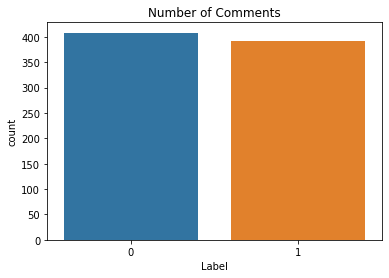

In [ ]:
sns.countplot(comment_Cleaned_NonWord_Df.isPositive)
plt.xlabel('Label')
plt.title('Number of Comments')

In [ ]:
print(len(comment_Cleaned_NonWord_Df))

X = comment_Cleaned_NonWord_Df.Comments1
Y = comment_Cleaned_NonWord_Df.isPositive
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

max_words = 50
max_len_arr = [50,100,200,250,300,350,400,450,500,550,600,650,700,750,800,850]
bench_mark_results=[]


800


In [ ]:
for max_len in max_len_arr:
    startTime = time.time()
    tok = Tokenizer(num_words=max_words)
    tok.fit_on_texts(X_train)
    train_sequences = tok.texts_to_sequences(X_train)
    train_sequences_matrix = sequence.pad_sequences(train_sequences,maxlen=max_len)

    #Define the RNN structure.
    def RNN():
        inputs = Input(name='inputs',shape=[max_len])
        layer = Embedding(max_words,50,input_length=max_len)(inputs)
        layer = LSTM(10)(layer)
        layer = Dense(256,name='FC1')(layer)
        layer = Activation('relu')(layer)
        layer = Dropout(0.5)(layer)
        layer = Dense(1,name='out_layer')(layer)
        layer = Activation('sigmoid')(layer)
        model = Model(inputs=inputs,outputs=layer)
        return model

    model = RNN()   
    model.compile(loss='mean_absolute_error',optimizer=RMSprop(),metrics=['accuracy'])
    
    model.fit(train_sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    
    #Process the test set data.
    test_sequences = tok.texts_to_sequences(X_test)
    test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

    #Evaluate the model on the train set and test set.
    score_train = model.evaluate(train_sequences_matrix,Y_train)
    score_test = model.evaluate(test_sequences_matrix,Y_test)
    
    val_predict_train = (np.asarray(model.predict(train_sequences_matrix))).round()
    val_predict_test = (np.asarray(model.predict(test_sequences_matrix))).round()
    precision_train = precision_score(Y_train, val_predict_train,average='micro')
    precision_test = precision_score(Y_test, val_predict_test,average='micro')
    recall_train = recall_score(Y_train, val_predict_train,average='micro')
    recall_test = recall_score(Y_test, val_predict_test,average='micro')
    f1_score_train=f1_score(Y_train, val_predict_train,average='micro')
    f1_score_test=f1_score(Y_test, val_predict_test,average='micro')

    #print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_train[0],accr_train[1]))
    #print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_test[0],accr_test[1]))
    endTime = time.time()
    elapsedTime=endTime-startTime
    bench_mark_results.append({'max_len':max_len,                                
                                 'Precision[Training](%)':str(round(precision_train,2)*100),
                                 'F1-Score[Training](%)':str(round(f1_score_train,2)*100),
                                 'Recall[Training](%)':str(round(recall_train,2)*100),
                                 'Mean Absolute Error[Training](%)':str(round(score_train[0],2)*100),
                                 'Precision[Test](%)':str(round(precision_test,2)*100),
                                 'F1-Score[Test](%)':str(round(f1_score_test,2)*100),
                                 'Recall[Test](%)':str(round(recall_test,2)*100),
                                 'Mean Absolute Error[Test](%)':str(round(score_test[0],2)*100),
                                 'Precision_Difference(%)':str((round((precision_train-precision_test),2)*100)),                                           
                                 'Elapsed_Time(Sec.)':str(round(elapsedTime,2))})
    
print(bench_mark_results)

Epoch 1/10
4/4 [==============================] - 3s 209ms/step - loss: 0.4992 - accuracy: 0.5221 - val_loss: 0.4942 - val_accuracy: 0.7578
Epoch 2/10
4/4 [==============================] - 0s 38ms/step - loss: 0.4902 - accuracy: 0.7562 - val_loss: 0.4806 - val_accuracy: 0.8359
Epoch 3/10
4/4 [==============================] - 0s 37ms/step - loss: 0.4743 - accuracy: 0.8365 - val_loss: 0.4597 - val_accuracy: 0.8828
Epoch 4/10
4/4 [==============================] - 0s 42ms/step - loss: 0.4484 - accuracy: 0.8870 - val_loss: 0.4317 - val_accuracy: 0.8438
Epoch 5/10
4/4 [==============================] - 0s 40ms/step - loss: 0.4179 - accuracy: 0.8760 - val_loss: 0.4015 - val_accuracy: 0.8438
Epoch 6/10
4/4 [==============================] - 0s 39ms/step - loss: 0.3779 - accuracy: 0.8635 - val_loss: 0.3570 - val_accuracy: 0.8984
Epoch 7/10
4/4 [==============================] - 0s 39ms/step - loss: 0.3344 - accuracy: 0.8888 - val_loss: 0.3163 - val_accuracy: 0.8984
Epoch 8/10
4/4 [==========

In [ ]:
df = pd.DataFrame(bench_mark_results)
df

,max_len,Precision[Training](%),F1-Score[Training](%),Recall[Training](%),Mean Absolute Error[Training](%),Precision[Test](%),F1-Score[Test](%),Recall[Test](%),Mean Absolute Error[Test](%),Precision_Difference(%),Elapsed_Time(Sec.)
0,50,90.0,90.0,90.0,21.0,87.0,87.0,87.0,22.0,3.0,5.41
1,100,89.0,89.0,89.0,22.0,86.0,86.0,86.0,22.0,3.0,6.92
2,200,90.0,90.0,90.0,23.0,87.0,87.0,87.0,24.0,4.0,8.01
3,250,91.0,91.0,91.0,21.0,86.0,86.0,86.0,22.0,4.0,9.11
4,300,90.0,90.0,90.0,21.0,87.0,87.0,87.0,22.0,3.0,9.71
5,350,90.0,90.0,90.0,21.0,88.0,88.0,88.0,22.0,2.0,10.91
6,400,89.0,89.0,89.0,21.0,88.0,88.0,88.0,22.0,2.0,11.36
7,450,90.0,90.0,90.0,22.0,86.0,86.0,86.0,23.0,4.0,12.92
8,500,91.0,91.0,91.0,22.0,86.0,86.0,86.0,23.0,6.0,13.63
9,550,90.0,90.0,90.0,21.0,88.0,88.0,88.0,22.0,2.0,15.0


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
max_words_arr = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]
max_len = 50
bench_mark_results=[]

In [ ]:
for max_words in max_words_arr:
    startTime = time.time()
    tok = Tokenizer(num_words=max_words)
    tok.fit_on_texts(X_train)
    train_sequences = tok.texts_to_sequences(X_train)
    train_sequences_matrix = sequence.pad_sequences(train_sequences,maxlen=max_len)

    #Define the RNN structure.
    def RNN():
        gru_input = Input(shape=(max_len,))
        embedding = Embedding(max_words, 128, input_length=max_len)(gru_input)
        gru = GRU(128)(embedding)
        dropout = Dropout(0.4)(gru)      
        dense = Dense(1)(dropout)
        activation = Activation('sigmoid')(dense)
        model = Model(gru_input, activation)
        model.summary()     
        return model

    model = RNN()   
    model.compile(loss='mean_absolute_error',optimizer=RMSprop(),metrics=['accuracy'])    
    model.fit(train_sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    
    #Process the test set data.
    test_sequences = tok.texts_to_sequences(X_test)
    test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

    #Evaluate the model on the train set and test set.
    score_train = model.evaluate(train_sequences_matrix,Y_train)
    score_test = model.evaluate(test_sequences_matrix,Y_test)
    
    val_predict_train = (np.asarray(model.predict(train_sequences_matrix))).round()
    val_predict_test = (np.asarray(model.predict(test_sequences_matrix))).round()
    precision_train = precision_score(Y_train, val_predict_train,average='micro')
    precision_test = precision_score(Y_test, val_predict_test,average='micro')
    recall_train = recall_score(Y_train, val_predict_train,average='micro')
    recall_test = recall_score(Y_test, val_predict_test,average='micro')
    f1_score_train=f1_score(Y_train, val_predict_train,average='micro')
    f1_score_test=f1_score(Y_test, val_predict_test,average='micro')

    endTime = time.time()
    elapsedTime=endTime-startTime
    bench_mark_results.append({'max_words':max_words,                                
                                'Precision[Training](%)':str(round(precision_train,2)*100),
                                 'F1-Score[Training](%)':str(round(f1_score_train,2)*100),
                                 'Recall[Training](%)':str(round(recall_train,2)*100),
                                 'Mean Absolute Error[Training](%)':str(round(score_train[0],2)*100),
                                 'Precision[Test](%)':str(round(precision_test,2)*100),
                                 'F1-Score[Test](%)':str(round(f1_score_test,2)*100),
                                 'Recall[Test](%)':str(round(recall_test,2)*100),
                                 'Mean Absolute Error[Test](%)':str(round(score_test[0],2)*100),
                                 'Precision_Difference(%)':str((round((precision_train-precision_test),2)*100)),                                           
                                 'Elapsed_Time(Sec.)':str(round(elapsedTime,2))})    
    
print(bench_mark_results)

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 50, 128)           6400      
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dropout_97 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_32 (Activation)   (None, 1)                 0         
Total params: 105,601
Trainable params: 105,601
Non-trainable params: 0
____________________________________________________

In [ ]:
df = pd.DataFrame(bench_mark_results)
df

,max_words,Precision[Training](%),F1-Score[Training](%),Recall[Training](%),Mean Absolute Error[Training](%),Precision[Test](%),F1-Score[Test](%),Recall[Test](%),Mean Absolute Error[Test](%),Precision_Difference(%),Elapsed_Time(Sec.)
0,50,86.0,86.0,86.0,14.000000000000002,91.0,91.0,91.0,10.0,-4.0,8.68
1,100,95.0,95.0,95.0,7.000000000000001,94.0,94.0,94.0,6.0,1.0,10.67
2,150,92.0,92.0,92.0,9.0,94.0,94.0,94.0,7.000000000000001,-2.0,9.72
3,200,95.0,95.0,95.0,6.0,94.0,94.0,94.0,6.0,1.0,10.57
4,250,48.0,48.0,48.0,49.0,51.0,51.0,51.0,45.0,-3.0,5.71
5,300,93.0,93.0,93.0,10.0,92.0,92.0,92.0,10.0,0.0,8.64
6,350,93.0,93.0,93.0,8.0,94.0,94.0,94.0,7.000000000000001,-0.0,9.74
7,400,93.0,93.0,93.0,7.000000000000001,94.0,94.0,94.0,7.000000000000001,-1.0,10.56
8,450,96.0,96.0,96.0,5.0,95.0,95.0,95.0,6.0,1.0,11.01
9,500,91.0,91.0,91.0,14.000000000000002,90.0,90.0,90.0,14.000000000000002,1.0,8.0


In [ ]:
tf_idf=TfidfVectorizer(sublinear_tf=True,min_df=3,norm='l2',encoding='utf-8',ngram_range=(1,3))
train_featurs=tf_idf.fit_transform(X_train)
test_featurs=tf_idf.transform(X_test)
train_labls=Y_train
test_labls=Y_test

In [ ]:
# Create classifiers
dt=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                            max_depth=3, max_features=None, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=10,
                                            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                            splitter='best')

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=2,
                                            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)

ad=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                      learning_rate=0.05, n_estimators=16, random_state=None)

lg=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                      intercept_scaling=1, max_iter=100, multi_class='multinomial',
                                      n_jobs=1, penalty='l1', random_state=0, solver='saga',
                                      tol=0.0001, verbose=0, warm_start=False)

In [ ]:
seed = 1075
no_Of_Folds=10
accuracy_scores=[]

eclf=VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('ad', ad),('lg',lg)], voting='soft')
bagging_clf = BaggingClassifier(eclf, max_samples=0.4, max_features=10, random_state=seed)
bagging_clf.fit(train_featurs,train_labls)  
eclf.fit(train_featurs,train_labls)  


#Train data set with bagging
yPredicted_train_bag = bagging_clf.predict(train_featurs)
precision_train_bag,recall_train_bag,fscore_train_bag,support_train_bag=score(train_labls,yPredicted_train_bag,average='macro')
 

#Test data set with bagging
yPredicted_test_bag = bagging_clf.predict(test_featurs)
precision_test_bag,recall_test_bag,fscore_test_bag,support_test_bag=score(test_labls,yPredicted_test_bag,average='macro')


#Train data set without bagging
yPredicted_train_without_bag = eclf.predict(train_featurs)
precision_train_without_bag,recall_train_without_bag,fscore_train_without_bag,support_train_without_bag=score(train_labls,yPredicted_train_without_bag,average='macro')
cross_val_score_train_without_bag=cross_val_score(eclf, train_featurs , train_labls, cv=no_Of_Folds) 

#Test data set without bagging
yPredicted_test_without_bag = eclf.predict(test_featurs)
precision_test_without_bag,recall_test_without_bag,fscore_test_without_bag,support_test_without_bag=score(test_labls,yPredicted_test_without_bag,average='macro')


In [ ]:
accuracy_scores.append({
                                    'Is Bagging Used':'YES',
                                     'Precision[Training](%)':str(round(precision_train_bag,2)*100),                                     
                                     'Precision[Test](%)':str(round(precision_test_bag,2)*100),                                    
                                     'Precision_Difference(%)':str((round((round(precision_train_bag,2)-round(precision_test_bag,2)),2)*100)),
                                     'Mean Absolute Error[Training](%)':Get_Absolute_Mean_Error(train_labls,yPredicted_train_bag),
                                     'Mean Absolute Error[Test](%)':Get_Absolute_Mean_Error(test_labls,yPredicted_test_bag),
                                     'F1-Score[Train](%)':str(round(fscore_train_bag,2)*100),
                                     'F1-Score[Test](%)':str(round(fscore_test_bag,2)*100),
                                     'Recall[Train](%)':str(round(recall_train_bag,2)*100),
                                     'Recall[Test](%)':str(round(recall_test_bag,2)*100),
                                     #'CV Score[Train](%)':str(round(cross_val_score_train_bag.mean(),2)*100),
                                     #'CV Score[Test](%)':str(round(cross_val_score_test_bag.mean(),2)*100)
    
    
                                   })

accuracy_scores.append({             
                                     'Is Bagging Used':'NO',
                                     'Precision[Training](%)':str(round(precision_train_without_bag,2)*100),                                     
                                     'Precision[Test](%)':str(round(precision_test_without_bag,2)*100),                                    
                                     'Precision_Difference(%)':str((round((round(precision_train_without_bag,2)-round(precision_test_without_bag,2)),2)*100)),
                                     'Mean Absolute Error[Training](%)':Get_Absolute_Mean_Error(train_labls,yPredicted_train_without_bag),
                                     'Mean Absolute Error[Test](%)':Get_Absolute_Mean_Error(test_labls,yPredicted_test_without_bag),
                                     'F1-Score[Train](%)':str(round(fscore_train_without_bag,2)*100),
                                     'F1-Score[Test](%)':str(round(fscore_test_without_bag,2)*100),
                                     'Recall[Train](%)':str(round(recall_train_without_bag,2)*100),
                                     'Recall[Test](%)':str(round(recall_test_without_bag,2)*100),                              
    
                                   })

print(accuracy_scores)

[{'Is Bagging Used': 'YES', 'Precision[Training](%)': '82.0', 'Precision[Test](%)': '80.0', 'Precision_Difference(%)': '2.0', 'Mean Absolute Error[Training](%)': 23.59, 'Mean Absolute Error[Test](%)': 25.62, 'F1-Score[Train](%)': '76.0', 'F1-Score[Test](%)': '73.0', 'Recall[Train](%)': '77.0', 'Recall[Test](%)': '74.0'}, {'Is Bagging Used': 'NO', 'Precision[Training](%)': '91.0', 'Precision[Test](%)': '89.0', 'Precision_Difference(%)': '2.0', 'Mean Absolute Error[Training](%)': 10.16, 'Mean Absolute Error[Test](%)': 13.12, 'F1-Score[Train](%)': '90.0', 'F1-Score[Test](%)': '87.0', 'Recall[Train](%)': '90.0', 'Recall[Test](%)': '87.0'}, {'Is Bagging Used': 'YES', 'Precision[Training](%)': '82.0', 'Precision[Test](%)': '80.0', 'Precision_Difference(%)': '2.0', 'Mean Absolute Error[Training](%)': 23.59, 'Mean Absolute Error[Test](%)': 25.62, 'F1-Score[Train](%)': '76.0', 'F1-Score[Test](%)': '73.0', 'Recall[Train](%)': '77.0', 'Recall[Test](%)': '74.0'}, {'Is Bagging Used': 'NO', 'Precisi

In [ ]:
df = pd.DataFrame(accuracy_scores)
df

,Is Bagging Used,Precision[Training](%),Precision[Test](%),Precision_Difference(%),Mean Absolute Error[Training](%),Mean Absolute Error[Test](%),F1-Score[Train](%),F1-Score[Test](%),Recall[Train](%),Recall[Test](%)
0,YES,82.0,80.0,2.0,23.59,25.62,76.0,73.0,77.0,74.0
1,NO,91.0,89.0,2.0,10.16,13.12,90.0,87.0,90.0,87.0
2,YES,82.0,80.0,2.0,23.59,25.62,76.0,73.0,77.0,74.0
3,NO,91.0,89.0,2.0,10.16,13.12,90.0,87.0,90.0,87.0
4,YES,82.0,80.0,2.0,23.59,25.62,76.0,73.0,77.0,74.0
5,NO,91.0,89.0,2.0,10.16,13.12,90.0,87.0,90.0,87.0
